<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02202019_1%5D_Tensorflow_MNIST_Hand_Writing_Digit_Demo_CNN_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

In [0]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("official/mnist/dataset.py",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting official/mnist/dataset.py/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting official/mnist/dataset.py/t10k-images-idx3-ubyte.gz
Extracting official/mnist/dataset.py/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
def weight(shape):
  return tf.Variable(tf.truncated_normal(shape,stddev=0.1),name="W")

def bias(shape):
  return tf.Variable(tf.constant(0.1,shape=shape),name='b')

def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

#  Model Construction

In [0]:
with tf.name_scope("Input_Layer"):
  x=tf.placeholder('float',shape=[None,784],name='x')
  x_image=tf.reshape(x,[-1,28,28,1])

In [0]:
with tf.name_scope('C1_Conv'):
  W1=weight([5,5,1,16])
  b1=bias([16])
  Conv1=conv2d(x_image,W1)+b1
  C1_Conv=tf.nn.relu(Conv1)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
with tf.name_scope('C1_Pool'):
  C1_Pool = max_pool_2x2(C1_Conv)

In [0]:
with tf.name_scope('C2_Conv'):
  W2=weight([5,5,16,36])
  b2=bias([36])
  Conv2=conv2d(C1_Pool,W2)+b2
  C2_Conv=tf.nn.relu(Conv2)

In [0]:
with tf.name_scope('C2_Pool'):
  C2_Pool = max_pool_2x2(C2_Conv)

In [0]:
with tf.name_scope("D_Flat"):
  D_Flat=tf.reshape(C2_Pool,[-1,1764])

In [0]:
with tf.name_scope("D_Hidden_Layer"):
  W3=weight([1764,128])
  b3=bias([128])
  D_Hidden=tf.nn.relu(tf.matmul(D_Flat,W3)+b3)
  D_Hidden_Dropout=tf.nn.dropout(D_Hidden,keep_prob=0.8)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
with tf.name_scope('Output_Layer'):
  W4=weight([128,10])
  b4=bias([10])
  y_predict=tf.nn.softmax(tf.matmul(D_Hidden_Dropout,W4)+b4)

In [0]:
with tf.name_scope("optimizer"):
  y_label = tf.placeholder('float',shape=[None,10],name='y_label')
  loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))
  optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
with tf.name_scope("evaluate_model"):
  correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))
  accuracy=tf.reduce_mean(tf.cast(correct_prediction,'float'))

# Training

In [0]:
trainEpochs = 30
batchSize = 100
totalBatchs =int(mnist.train.num_examples/batchSize)
loss_list=[];epoch_list=[];accuracy_list=[]
from time import time
startTime=time()
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
for epoch in range(trainEpochs):
  for i in range(totalBatchs):
    batch_x,batch_y=mnist.train.next_batch(batchSize)
    sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y})
    
  loss,acc=sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,y_label:mnist.validation.labels})
  
  epoch_list.append(epoch)
  loss_list.append(loss)
  accuracy_list.append(acc)
  print('Train Epoch:',  '%02d' % (epoch+1), 'Loss=', '{:.9f}'.format(loss),'Accuracy=',acc)
  
duration =time()-startTime
print("Train Finished takes :",duration)

Train Epoch: 01 Loss= 1.496325970 Accuracy= 0.9678
Train Epoch: 02 Loss= 1.489772797 Accuracy= 0.9716
Train Epoch: 03 Loss= 1.485150933 Accuracy= 0.9772
Train Epoch: 04 Loss= 1.482161283 Accuracy= 0.9788
Train Epoch: 05 Loss= 1.478735566 Accuracy= 0.9824
Train Epoch: 06 Loss= 1.477056026 Accuracy= 0.9848
Train Epoch: 07 Loss= 1.474501729 Accuracy= 0.9872
Train Epoch: 08 Loss= 1.475055456 Accuracy= 0.9864
Train Epoch: 09 Loss= 1.472748399 Accuracy= 0.9892
Train Epoch: 10 Loss= 1.471974850 Accuracy= 0.9898
Train Epoch: 11 Loss= 1.473368406 Accuracy= 0.9878
Train Epoch: 12 Loss= 1.473293781 Accuracy= 0.988
Train Epoch: 13 Loss= 1.475155830 Accuracy= 0.9862
Train Epoch: 14 Loss= 1.473225951 Accuracy= 0.9882
Train Epoch: 15 Loss= 1.471629143 Accuracy= 0.9892
Train Epoch: 16 Loss= 1.471693635 Accuracy= 0.9896
Train Epoch: 17 Loss= 1.471548200 Accuracy= 0.9894
Train Epoch: 18 Loss= 1.475011468 Accuracy= 0.9866
Train Epoch: 19 Loss= 1.472118616 Accuracy= 0.9888
Train Epoch: 20 Loss= 1.47207224

# Evaluation

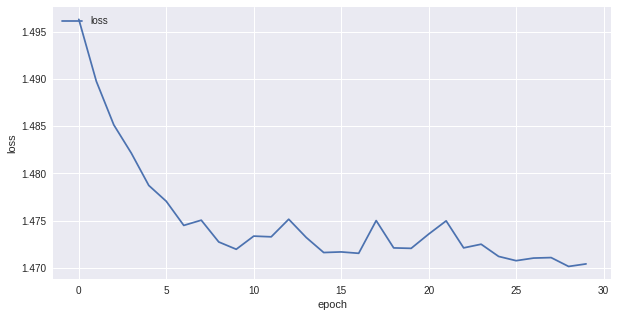

In [0]:
#%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')

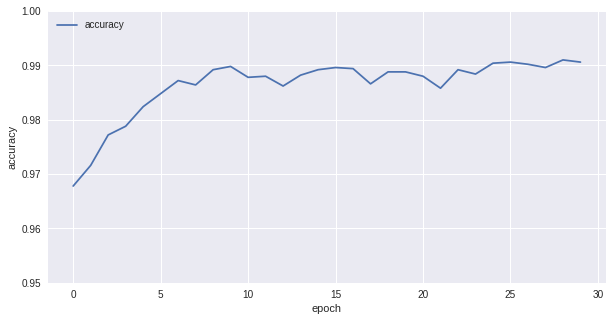

In [0]:
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.plot(epoch_list,accuracy_list,label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.95,1)
plt.legend(['accuracy'],loc='upper left')

In [0]:
print("Accuracy:",sess.run(accuracy,feed_dict={x:mnist.test.images,y_label:mnist.test.labels}))

Accuracy: 0.99


# Prediction

In [0]:
prediction_result=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

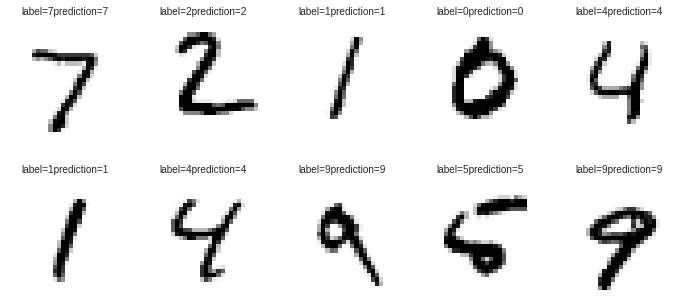

In [0]:
import numpy as np

def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
  fig=plt.gcf()
  fig.set_size_inches(12,14)
  if num>25: num=25
  for i in range(0,num):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
    title='label='+str(np.argmax(labels[idx]))
    if len(prediction)>0:
      title+='prediction='+str(prediction[idx])
      
    ax.set_title(title,fontsize=10)
    ax.set_xticks([]);ax.set_yticks([])
    idx+=1
  plt.show()

plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,0)